# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: J.T. Flume

EID: 

Name: 

EID: 

#Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

We will denote $P(C_1|x)$ as $f(x)$.

The expected loss of choosing class 1: $E(Loss|C_1) =  f(x)*0 + (1-f(x))*4$

The expected loss of choosing class 2: $E(Loss|C_2) =  f(x)*2 + (1-f(x))*0$

The loss of rejection is constant at $1$.

Our decision function is simple: we always make the decision where our expected loss is minimized.

Solving for where $ E(Loss|C_1) < E(Loss|C_2)$ we discover the loss from choosing $C_1$ is less than choosing $C_2$ when $f(x) >2/3$

So we now have: choose $C_1$ when $f(x) > 2/3$, otherwise, choose $C_2$.

<br>

But we still need to discover when it is optimal to reject. To do so, we compare both the expected loss for $C_1$ and $C_2$ to see when they are less than 1.

After solving for both, we discover that:

 $ E(Loss|C_1) < 1$ when $f(x) > 3/4$
 
  and:
 
  $ E(Loss|C_2) < 1$ when $f(x) > 1/2$

<br>

Therefore, the final decision rule is:

* If $f(x) < 1/2$, choose: $C_2$

* Else if  $f(x) < 3/4$, choose the reject option
* Else, choose: $C_1$

We can see the same result in the graph below!

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set_theme()
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

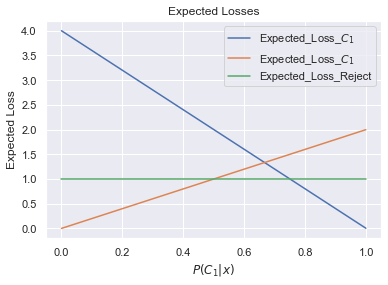

In [6]:
probs = np.arange(0,1,.001)

loss_c_1 = (1-probs) * 4
loss_c_2 = probs*2
rejects = [1]*len(probs)

plt.plot(probs, loss_c_1,label='Expected_Loss_$C_1$')
plt.plot(probs, loss_c_2,label='Expected_Loss_$C_1$')
plt.plot(probs,rejects,label='Expected_Loss_Reject')
plt.title('Expected Losses')
plt.xlabel('$P(C_1|x)$')
plt.ylabel('Expected Loss')
plt.legend()

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

## Answer:

#### Load Data

In [7]:
data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

### A) Make predictions with Logistic Regression and print results

In [8]:
logistic_model = LogisticRegression() # Create Model
logistic_model.fit(X_train, y_train) # Fit Model

y_predicted_train = logistic_model.predict(X_train)
y_predicted_test = logistic_model.predict(X_test)

Results on training set:

In [9]:
print(classification_report(y_train, y_predicted_train))

              precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300



Results on test set:

In [10]:
print(classification_report(y_test, y_predicted_test))

              precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



### B) Plot Data
Below, after plotting the data, we see that a simple linear separator will undoubtably do a poor job. Based, on this graph, we would really like to have an elipse, surrounding the True points as our classifier.

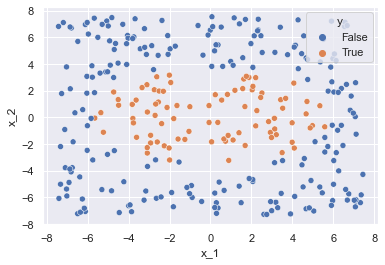

In [11]:
df = pd.DataFrame(X_train, columns=['x_1','x_2'])
df['y'] = y_train
sns.scatterplot(data=df,x='x_1',y='x_2',hue='y');

### C) Transform and Refit

In attempt to make our data more malleable to a logistic regression classifier, we will raise the inputs to the power of 2, which is inspired by the above plot and the equation for an elipse. We plot the results after transformation below, and it cetainly looks like we can now find a linear separator for this data!

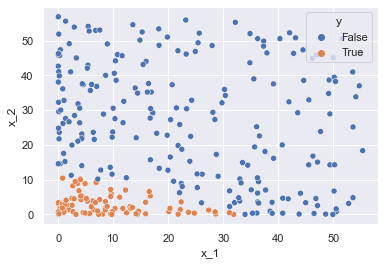

In [12]:
X_train_transformed = np.power(X_train,2)
X_test_transformed = np.power(X_test,2)

df = pd.DataFrame(X_train_transformed, columns=['x_1','x_2'])
df['y'] = y_train
sns.scatterplot(data=df,x='x_1',y='x_2',hue='y');

Now, refit the model on transformed data and predict again.

In [13]:
logistic_model = LogisticRegression() # Create Model
logistic_model.fit(X_train_transformed, y_train) # Fit Model

x_train_predictions = logistic_model.predict(X_train_transformed)


y_predicted_train = logistic_model.predict(X_train_transformed)
y_predicted_test = logistic_model.predict(X_test_transformed)

Results on training set:

In [14]:
print(classification_report(y_train, y_predicted_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       214
        True       0.99      0.99      0.99        86

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Results on test set:

In [15]:
print(classification_report(y_test, y_predicted_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        69
        True       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [16]:
y_train.sum()

86

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [17]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:


$$P(A)*P(B|A)*P(D|B)*P(E|B)*P(C|A,E)*P(F|D,E,C)$$

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: 


b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

## Answer:

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.calibration import CalibrationDisplay

plt.rcParams["figure.figsize"] = (9, 5.5)

## Data Set 1: Breast Cancer

### A) Train three models and report accuracies on training and test data sets

In [19]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']

X = pd.DataFrame(data=X, columns=cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# Create a dataframe to store each models accuracy for train and test set
df_cancer_results = pd.DataFrame(data=np.zeros((3,2)), columns=['train','test'], index=['Logistic','Random_Forest','MLP'])

# Fit Logistic Model and input accuracies into dataframe
logistic_model = LogisticRegression().fit(X_train, y_train)
df_cancer_results.loc['Logistic', 'train'] = (logistic_model.predict(X_train) == y_train).mean()
df_cancer_results.loc['Logistic', 'test'] = (logistic_model.predict(X_test) == y_test).mean()

# Fit Random Forest Model and input accuracies into dataframe
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
df_cancer_results.loc['Random_Forest', 'train'] = (random_forest_model.predict(X_train) == y_train).mean()
df_cancer_results.loc['Random_Forest', 'test'] = (random_forest_model.predict(X_test) == y_test).mean()


# Fit MLP Model and input accuracies into dataframe
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
df_cancer_results.loc['MLP', 'train'] = (mlp_model.predict(X_train) == y_train).mean()
df_cancer_results.loc['MLP', 'test'] = (mlp_model.predict(X_test) == y_test).mean()

Accuracies:

In [21]:
df_cancer_results

,train,test
Logistic,0.955381,0.968085
Random_Forest,1.000000,0.968085
MLP,0.916010,0.978723


### B) Calibration Curves
We will now plot the calibration curves on the full dataset. To do that, we will refit each model on the full data set, and then plot each calibration curve on the same plot.

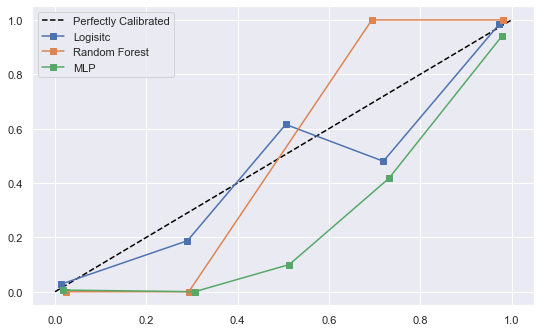

In [22]:

def plot_calibration_curves(models_dict:dict, X, y , bins=5):
    """Send in a dictionary of models where the keys are the model names and values are the instantiated model.
        The funciton will fit each model based on the provided 'X' and 'y' data. Then it will plot the calibration curves.
    """    
    # Plot the perfect calibration line
    plt.plot([0,1],[0,1], linestyle='dashed', color='black', label='Perfectly Calibrated')

    for model_name, model in models_dict.items():
        model.fit(X,y)
        y_prob = model.predict_proba(X)[:,1]
        prob_true, prob_pred = calibration_curve(y, y_prob)
        plt.plot(prob_pred, prob_true, marker='s', label=model_name)
    
    plt.legend()


models_dict = {'Logisitc':LogisticRegression(),'Random Forest':RandomForestClassifier(),'MLP':MLPClassifier()}
plot_calibration_curves(models_dict, X, y)


### C) Counterfactuals

In [23]:
import dice_ml
from dice_ml.utils import helpers # helper functions
from scipy.stats import median_abs_deviation

def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()

Two helpful function here. The first, will generate the counterfactuals using dice and return that annoying dice object that you can then loop through to get the counterfactuals. The second function will actually loop through all of the counterfactuals and put them in one big dataframe for later use.

In [24]:
def generate_counter_factuals(X_data, trained_model, continuous_features:list, cf_method:str, cf_num:int, query_instances):
    """Return a CounterFactualExamples object"""

    d = dice_ml.Data(dataframe=X_data, continuous_features=continuous_features, outcome_name='target')
    m = dice_ml.Model(model=trained_model, backend='sklearn')
    exp_random = dice_ml.Dice(d, m, method=cf_method)
    dice_exp_random = exp_random.generate_counterfactuals(query_instances=query_instances, total_CFs=cf_num)

    return dice_exp_random

def make_cf_dataframe(cfs_obj):

    combined_cf_df = pd.DataFrame()
    
    for query_number, query_instance_cfs in enumerate(cfs_obj._cf_examples_list):
        cf_df = query_instance_cfs.final_cfs_df.copy()
        cf_df['query_number'] = query_number
        combined_cf_df = pd.concat([combined_cf_df,cf_df])

    combined_cf_df.index = range(len(combined_cf_df))

    return combined_cf_df

All of the fun functions below are just used to calculate the metrics, where they will receive a dataframe of counterfactuals and a series containing the query instance to get the metrics on.

In [25]:
def calculate_validity(cf_df:pd.DataFrame, query_instance:pd.DataFrame):
    cf_df.drop(columns=['query_number'])
    actual_counter_factuals = cf_df['target'] != query_instance['target']
    
    return sum(actual_counter_factuals)/len(cf_df)


def calculate_distance(row_1:pd.Series, row_2:pd.Series):
    abs_differences = np.abs(row_1 - row_2)
    abs_diffs_scaled_by_median = abs_differences / X_train.apply(median_abs_deviation)
    distance = sum(abs_diffs_scaled_by_median)/len(row_1)
    return distance

def calculate_proximity(cf_df:pd.DataFrame, query_instance:pd.DataFrame):

    cf_df = cf_df.drop(columns=['target','query_number'])
    all_proximities = []
    for index, row in cf_df.iterrows():
        all_proximities.append(calculate_distance(query_instance, row))
        
    avg_proximity = sum(all_proximities)/len(cf_df)
    return -avg_proximity


def calculate_sparsity(cf_df:pd.DataFrame, query_instance:pd.DataFrame):

    cf_df = cf_df.drop(columns=['target','query_number'])
    all_diffs = []
    for index, row in cf_df.iterrows():
        num_diff_features = sum((row - query_instance).astype(bool))
        all_diffs.append(num_diff_features)
    sparsity = 1 - sum(all_diffs)/(len(cf_df)*len(query_instance))

    return sparsity

def calculate_diversity(cf_df:pd.DataFrame, query_instance_df:pd.DataFrame):
    cf_df = cf_df.drop(columns=['target','query_number'])
    all_distances = []

    cf_count = len(cf_df)
    for i in range(cf_count):
        for j in range(i+1,cf_count):
            pairwise_distance = calculate_distance(cf_df.iloc[i], cf_df.iloc[j])
            all_distances.append(pairwise_distance)

    return sum(all_distances)/len(all_distances)

#### Inputs and set up for counterfactuals

We have to adjust the data to make sure it is in the right format for dice. We do that below.

In [214]:
# Copy all of the original data and put it into a formate that dice wants, where the target is in the same dataframe as inputs

X_data_all = X.copy() 
X_data_all['target'] = y # Dice wants there to be a target
all_features = list(X.columns)[:-1] # All columns are continuos, but we don't want the target variable
continuous_feautres = all_features # All features are continious in this dataset
X_test_diced = X_test.copy()
X_test_diced['target'] = y_test # We will need the targets later on when calculating metrics.

query_instances = X_test_diced.iloc[:15,:] # First 15

### WARNING!! Below cell takes around 30 minutes to run.

This is the real meat of the program. It should spit out the requested dataframe in the problem for all three models and all the metrics, but unfortunately, Dice was giving us trouble when trying to run with the genetic method. So we commented it out. But if you uncomment out the third line below, it's possible that the script will run and it will be perfect! But otherwise, you'll see the dataframe below which is missing 3 more 4 more columns for the genetic counterfactuals metrics.

In [215]:
trained_models = models_dict = {'Logisitc':logistic_model,'Random Forest':random_forest_model,'MLP':mlp_model}

cf_methods = ['random']
# cf_methods = ['random','genetic']

def evaluate_all_models_and_metrics(trained_models_dict, cf_methods, all_features:list, continuous_features:list, cf_num:int, query_instances):
    
    df_metrics = pd.DataFrame()

    query_instances_no_target = query_instances.drop(columns='target')

    for cf_method in cf_methods:
        print(cf_method)
        for model_name, trained_model in trained_models_dict.items():
            # Generate counter factuals for this method type and model
            counter_factuals_obj = generate_counter_factuals(X_data_all,trained_model,continuous_features,cf_method, cf_num=cf_num,query_instances=query_instances_no_target)
            # df to hold all counterfactuals and store their associated query number
            combo_cf_df = make_cf_dataframe(counter_factuals_obj)

            # Now we can calculate metrics!!
            proximities = []
            diversities = []
            sparsities = []
            validities = []


            for query_number in range(len(query_instances)):
                cf_df_filtered = combo_cf_df[combo_cf_df['query_number'] == query_number]
                query_instance = query_instances.iloc[query_number]
                query_instance_no_target = query_instances_no_target.iloc[query_number]

                validities.append(calculate_validity(cf_df_filtered,query_instance))
                proximities.append(calculate_proximity(cf_df_filtered, query_instance_no_target))
                sparsities.append(calculate_sparsity(cf_df_filtered,query_instance))
                diversities.append(calculate_diversity(cf_df_filtered,query_instance))

            # Put the average for all metrics into df of metrics
            df_metrics.loc[model_name, f'validity_{cf_method}'] = sum(validities)/len(validities)
            df_metrics.loc[model_name, f'proximity_{cf_method}'] = sum(proximities)/len(proximities)
            df_metrics.loc[model_name, f'sparsity_{cf_method}'] = sum(sparsities)/len(sparsities)
            df_metrics.loc[model_name, f'diversity_{cf_method}'] = sum(diversities)/len(diversities)

    return df_metrics

df_metrics_breast_cancer = evaluate_all_models_and_metrics(trained_models, cf_methods, all_features, continuous_feautres,cf_num=5, query_instances = query_instances)
# evaluate_all_models_and_metrics(trained_models, cf_methods, all_features, continuous_feautres,cf_num=2, query_instances = query_instances.iloc[:2,:])


random


100%|██████████| 15/15 [06:15<00:00, 25.01s/it]


In [216]:
df_metrics_breast_cancer

,validity_random,proximity_random,sparsity_random,diversity_random
Logisitc,1.000000,-0.472237,0.914409,0.675801
Random Forest,0.746667,-1.712614,0.701075,1.980102
MLP,0.933333,-0.525708,0.883871,0.835461


## Data Set 2: Adult Census

### A) Train three models and report accuracies on training and test data sets

#### Adult

In [26]:
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']].values
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test

In [27]:

# Create a dataframe to store each models accuracy for train and test set
df_adult_results = pd.DataFrame(data=np.zeros((3,2)), columns=['train','test'], index=['Logistic','Random_Forest','MLP'])

# Fit Logistic Model and input accuracies into dataframe
logistic_model = LogisticRegression().fit(X_train, y_train)
df_adult_results.loc['Logistic', 'train'] = (logistic_model.predict(X_train) == y_train).mean()
df_adult_results.loc['Logistic', 'test'] = (logistic_model.predict(X_test) == y_test).mean()

# Fit Random Forest Model and input accuracies into dataframe
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
df_adult_results.loc['Random_Forest', 'train'] = (random_forest_model.predict(X_train) == y_train).mean()
df_adult_results.loc['Random_Forest', 'test'] = (random_forest_model.predict(X_test) == y_test).mean()


# Fit MLP Model and input accuracies into dataframe
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
df_adult_results.loc['MLP', 'train'] = (mlp_model.predict(X_train) == y_train).mean()
df_adult_results.loc['MLP', 'test'] = (mlp_model.predict(X_test) == y_test).mean()


df_adult_results

,train,test
Logistic,0.789915,0.796669
Random_Forest,1.000000,0.853899
MLP,0.789457,0.795552


### B) Calibration Curves
We will now plot the calibration curves on the full dataset. To do that, we will refit each model on the full data set, and then plot each calibration curve on the same plot.

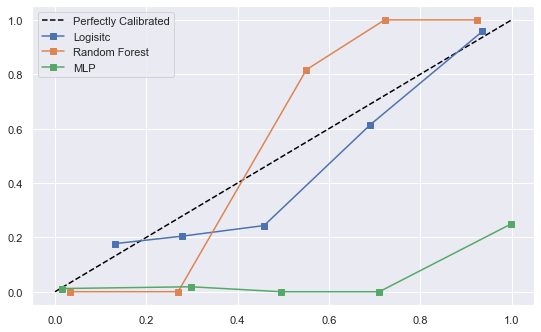

In [28]:
models_dict = {'Logisitc':LogisticRegression(),'Random Forest':RandomForestClassifier(),'MLP':MLPClassifier()}
plot_calibration_curves(models_dict, X, y)

### C) Counterfactuals

Ideally, this should be very similiar stuff to before and we should be able to just utilize the same functions we created above. But, there appears to be a bug somewhere because of the NANs in the output and we were not able to figure it out unfortunately.

Again, below cell is getting the data in the right format for both how Dice wants it, and to make sure it is compatible with the functions we already created.

In [29]:
# Copy all of the original data and put it into a formate that dice wants, where the target is in the same dataframe as inputs
X_data_all = X.copy() 
X_data_all['target'] = y # Dice wants there to be a target
all_features = list(X.columns)[:-1] #  we don't want the target variable

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
continuous_feautures = list(X.select_dtypes(include=numerics).columns) #

X_test_diced = X_test.copy()
X_test_diced['target'] = y_test

query_instances = X_test_diced.iloc[:15,:] # First 15

In [32]:
trained_models = models_dict = {'Logisitc':logistic_model,'Random Forest':random_forest_model,'MLP':mlp_model}

cf_methods = ['random']
# cf_methods = ['random','genetic']

df_metrics_adult = evaluate_all_models_and_metrics(trained_models, cf_methods, all_features, continuous_feautures,cf_num=5, query_instances = query_instances)

random


100%|██████████| 15/15 [00:02<00:00,  6.65it/s]


In [34]:
df_metrics_adult

,validity_random,proximity_random,sparsity_random,diversity_random
Logisitc,0.8,NaN,0.962985,NaN
Random Forest,1.0,NaN,0.962985,NaN
MLP,0.8,NaN,0.964378,NaN
